In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

2023-08-09 11:12:44.245777: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mobile = tf.keras.applications.mobilenet.MobileNet()

2023-08-09 11:13:41.777530: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


17225924/17225924 [==============================] - 1s 0us/step


In [8]:
def prepare_image(file):
    img_path = '/home/kubera/Downloads/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

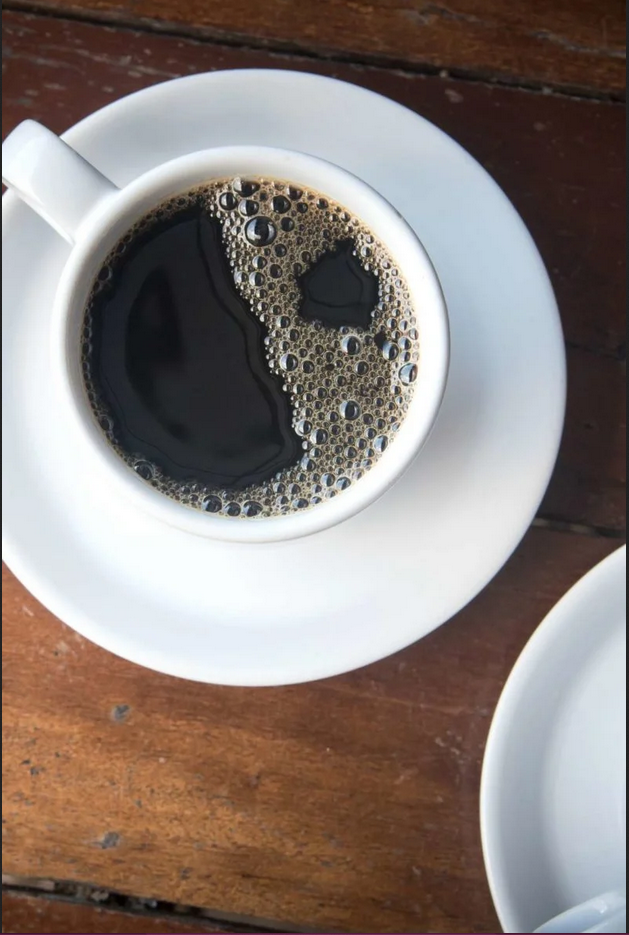

In [9]:
from IPython.display import Image 
Image(filename='/home/kubera/Downloads/test.png', width=300, height=200)

In [11]:
preprocessed_image = prepare_image('test.png')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 0us/step


[[('n07920052', 'espresso', 0.31701693),
  ('n03063599', 'coffee_mug', 0.1781884),
  ('n04553703', 'washbasin', 0.13757427),
  ('n03786901', 'mortar', 0.13292575),
  ('n07930864', 'cup', 0.07414296)]]